# Time Series Anaysis
Time Series are a sequence of data points ordered in time. Each data point contains one or more values and also has a time stamp. For instance, the average daily temperature is a time series. Time Series Analysis (TSA) is studying the behaviour of time series. 

An important part of time series analysis (TSA) is time series forcasting (TSF) which is using a sequence of data to predict future behaviour. In this session we will discuss TSA, and tool and technques in TSA. The next session will be focused on forcasting.


TSA has its own unique vocabulary and technical terms. Throughout this notebook we will explain some of these terms and what they mean in practice.


## Tools

One of the main tools for TSA is __Pandas__. In previous notebooks we learned about Pandas and it's capabilities in reading, writing, and manipulating tabular data. Pandas also has a wide range of functionalities for TSA. 

Another common tool for TSA in python is __Statsmodels__. Statsmodels is library with wide range of statistical analysis tools and a sub-module dedicated to TSA.

In [1]:
# Our main packages for TSA
import pandas as pd

# For math and array operations
import numpy as np

# For plotting
import matplotlib.pyplot as plt

Later, we will import statsmodels sub-modules as we need them.

## Pandas for time series

Pandas has functionalities for reading time and date. 

In [2]:
data_normal = pd.read_csv("../../data/processed/Generated/SampleSales.csv")
data_normal["Date"]

0      2014-11-08
1      2014-11-20
2      2014-12-01
3      2014-12-15
4      2014-12-15
          ...    
924    2017-04-25
925    2017-04-25
926    2017-04-25
927    2017-04-25
928    2017-04-26
Name: Date, Length: 929, dtype: object

When reading data that contains date/time we can ask pandas to parse it as datetimes with `parse_dates = ['Column_name']`.

In [3]:
data_date_parsed = pd.read_csv(
    "../../data/processed/Generated/SampleSales.csv", parse_dates=["Date"]
)
data_date_parsed["Date"]

0     2014-11-08
1     2014-11-20
2     2014-12-01
3     2014-12-15
4     2014-12-15
         ...    
924   2017-04-25
925   2017-04-25
926   2017-04-25
927   2017-04-25
928   2017-04-26
Name: Date, Length: 929, dtype: datetime64[ns]

In the first scenario when we print 'Date' column at the bottom it prints `dtype = object` which in this case it means pandas understands the dates as a string (or text). It has no understanding of what the dates actually mean. But in the second scenario, the type is `datetime64[ns]` which is a date/time object with accuracy of nanoseconds. Now pandas knows these are dates and it knows the year, month, day, etc. Also, despite showing only year, month, and day it is saving it to nanoseconds accuracy, which means we could also have time of the day included as well.


Also, by passing `index_col = 'Date'` we can let pandas know that in the index column, instead of using numbers (0, 1, 2, ...) use the _'Date'_ column. This will make it easier to access data based on date.

In [4]:
data_index_parsed = pd.read_csv(
    "../../data/processed/Generated/SampleSales.csv",
    parse_dates=["Date"],
    index_col=["Date"],
)
data_index_parsed.index

DatetimeIndex(['2014-11-08', '2014-11-20', '2014-12-01', '2014-12-15',
               '2014-12-15', '2014-12-19', '2014-12-21', '2014-12-24',
               '2014-12-30', '2015-01-01',
               ...
               '2017-04-24', '2017-04-24', '2017-04-25', '2017-04-25',
               '2017-04-25', '2017-04-25', '2017-04-25', '2017-04-25',
               '2017-04-25', '2017-04-26'],
              dtype='datetime64[ns]', name='Date', length=929, freq=None)

Now we can get the data for a certain date or time period.

In [5]:
data_index_parsed.loc["2014-12-19"]

Total    553.87814
Name: 2014-12-19 00:00:00, dtype: float64

In [6]:
data_index_parsed.loc["2014-11-01":"2014-12-01"]

,Total
Date,
2014-11-08,482.839269
2014-11-20,335.725804
2014-12-01,566.417526


Also, if you have an array of dates in string format you can use `.to_datetime()` to convert it to datetime object. The date string can be in many formats and pandas can usually figure it out.

In [7]:
pd.to_datetime(["1/3/2019", "July 23rd, 1964", "2006-01-09"])

DatetimeIndex(['2019-01-03', '1964-07-23', '2006-01-09'], dtype='datetime64[ns]', freq=None)

Or you can specify which format pandas should use.

In [8]:
pd.to_datetime(["1/3/2019"], format="%d/%m/%Y")

DatetimeIndex(['2019-03-01'], dtype='datetime64[ns]', freq=None)

In [9]:
pd.to_datetime(["1/3/2019"], format="%m/%d/%Y")

DatetimeIndex(['2019-01-03'], dtype='datetime64[ns]', freq=None)

## Resampling
There are times you might need weekly data but you have it on daily basis. You can use resampling to transform the data into the new time intervals. This is also useful when you are dealing with datapoints which are not equally spaced. Let's have another look at the data we loaded earlier.

In [10]:
data_index_parsed.head(10)

,Total
Date,
2014-11-08,482.839269
2014-11-20,335.725804
2014-12-01,566.417526
2014-12-15,401.477256
2014-12-15,518.200174
2014-12-19,553.878140
2014-12-21,533.135254
2014-12-24,535.213187
2014-12-30,457.167255


This data shows the time and amount of purchases from a shop. The purchases are not taking place on a fixed interval. They can happen anytime. We can resample this data into weekly sales which makes it easier to analyse. To do this, we need to use the `.resample()` method and pass in the new interval. After that we need to specify how we want the data in each interval to be aggregated. In this case, we choose the sum function because we want the total sales in each week.

In [11]:
df = data_index_parsed.resample("W").sum()
df.head(10)

,Total
Date,
2014-11-09,482.839269
2014-11-16,0.000000
2014-11-23,335.725804
2014-11-30,0.000000
2014-12-07,566.417526
2014-12-14,0.000000
2014-12-21,2006.690823
2014-12-28,535.213187
2015-01-04,760.333201


Now we have weekly sales. Note that we passed in "W" to convert the data into weekly sales. There are a range of options available in pandas for various intervals. The table below shows a range of options for resampling.<br>
Note that not all the options on the table below are applicable for resampling. The options for resampling are "M", "A", "Q", "BM", "BA", "BQ", and "W". The other options in the table have other application which we will discuss later.

DateOffsets and their frequency strings. ([Source](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects))<br>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Date Offset</th>
      <th>Frequency String</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>DateOffset</td>
      <td>None</td>
      <td>Generic offset class, defaults to 1 calendar day</td>
    </tr>
    <tr>
      <td>BDay or BusinessDay</td>
      <td>'B'</td>
      <td>business day (weekday)</td>
    </tr>
    <tr>
      <td>CDay or CustomBusinessDay</td>
      <td>'C'</td>
      <td>custom business day</td>
    </tr>
    <tr>
      <td>Week</td>
      <td>'W'</td>
      <td>one week, optionally anchored on a day of the week</td>
    </tr>
    <tr>
      <td>WeekOfMonth</td>
      <td>'WOM'</td>
      <td>the x-th day of the y-th week of each month</td>
    </tr>
    <tr>
      <td>LastWeekOfMonth</td>
      <td>'LWOM'</td>
      <td>the x-th day of the last week of each month</td>
    </tr>
    <tr>
      <td>MonthEnd</td>
      <td>'M'</td>
      <td>calendar month end</td>
    </tr>
    <tr>
      <td>MonthBegin</td>
      <td>'MS'</td>
      <td>calendar month begin</td>
    </tr>
    <tr>
      <td>BMonthEnd or BusinessMonthEnd</td>
      <td>'BM'</td>
      <td>business month end</td>
    </tr>
    <tr>
      <td>BMonthBegin or BusinessMonthBegin</td>
      <td>'BMS'</td>
      <td>business month begin</td>
    </tr>
    <tr>
      <td>CBMonthEnd or CustomBusinessMonthEnd</td>
      <td>'CBM'</td>
      <td>custom business month end</td>
    </tr>
    <tr>
      <td>CBMonthBegin or CustomBusinessMonthBegin</td>
      <td>'CBMS'</td>
      <td>custom business month begin</td>
    </tr>
    <tr>
      <td>SemiMonthEnd</td>
      <td>'SM'</td>
      <td>15th (or other day_of_month) and calendar month end</td>
    </tr>
    <tr>
      <td>SemiMonthBegin</td>
      <td>'SMS'</td>
      <td>15th (or other day_of_month) and calendar month begin</td>
    </tr>
    <tr>
      <td>QuarterEnd</td>
      <td>'Q'</td>
      <td>calendar quarter end</td>
    </tr>
    <tr>
      <td>QuarterBegin</td>
      <td>'QS'</td>
      <td>calendar quarter begin</td>
    </tr>
    <tr>
      <td>BQuarterEnd</td>
      <td>'BQ</td>
      <td>business quarter end</td>
    </tr>
    <tr>
      <td>BQuarterBegin</td>
      <td>'BQS'</td>
      <td>business quarter begin</td>
    </tr>
    <tr>
      <td>FY5253Quarter</td>
      <td>'REQ'</td>
      <td>retail (aka 52-53 week) quarter</td>
    </tr>
    <tr>
      <td>YearEnd</td>
      <td>'A'</td>
      <td>calendar year end</td>
    </tr>
    <tr>
      <td>YearBegin</td>
      <td>'AS' or 'BYS'</td>
      <td>calendar year begin</td>
    </tr>
    <tr>
      <td>BYearEnd</td>
      <td>'BA'</td>
      <td>business year end</td>
    </tr>
    <tr>
      <td>BYearBegin</td>
      <td>'BAS'</td>
      <td>business year begin</td>
    </tr>
    <tr>
      <td>FY5253</td>
      <td>'RE'</td>
      <td>retail (aka 52-53 week) year</td>
    </tr>
    <tr>
      <td>Easter</td>
      <td>None</td>
      <td>Easter holiday</td>
    </tr>
    <tr>
      <td>BusinessHour</td>
      <td>'BH'</td>
      <td>business hour</td>
    </tr>
    <tr>
      <td>CustomBusinessHour</td>
      <td>'CBH'</td>
      <td>custom business hour</td>
    </tr>
    <tr>
      <td>Day</td>
      <td>'D'</td>
      <td>one absolute day</td>
    </tr>
    <tr>
      <td>Hour</td>
      <td>'H'</td>
      <td>one hour</td>
    </tr>
    <tr>
      <td>Minute</td>
      <td>'T' or 'min'</td>
      <td>one minute</td>
    </tr>
    <tr>
      <td>Second</td>
      <td>'S'</td>
      <td>one second</td>
    </tr>
    <tr>
      <td>Milli</td>
      <td>'L' or 'ms'</td>
      <td>one millisecond</td>
    </tr>
    <tr>
      <td>Micro</td>
      <td>'U' or 'us'</td>
      <td>one microsecond</td>
    </tr>
    <tr>
      <td>Nano</td>
      <td>'N'</td>
      <td>one nanosecond</td>
    </tr>
  </tbody>
</table>


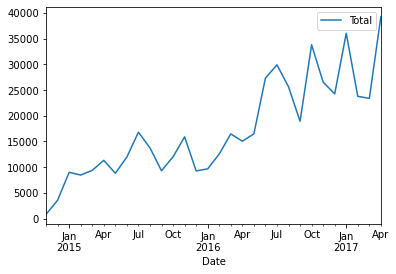

In [12]:
# monthly sales plot
data_index_parsed.resample("M").sum().plot(y="Total")

## Shifting
Shifiting is moving the data forward or backward in time. For instance, the code below shifts the data one week to the future.

In [13]:
df.shift(1)

,Total
Date,
2014-11-09,NaN
2014-11-16,482.839269
2014-11-23,0.000000
2014-11-30,335.725804
2014-12-07,0.000000
...,...
2017-04-02,4161.651045
2017-04-09,8315.345132
2017-04-16,10651.060072


In [14]:
df.head()

,Total
Date,
2014-11-09,482.839269
2014-11-16,0.000000
2014-11-23,335.725804
2014-11-30,0.000000
2014-12-07,566.417526


Notice the value that belonged to "2014-11-09" now belongs to "2014-11-09". Also, you can see in the first row since there was no data point to be moved there, its new value is `NaN`.<br>
Now the question is how does pandas know how much it should shift the data? In other words, why did it decide to move the data one week and not one day? The answer is because pandas knows our data is weekly, so when we asked it to shift the data by one period it assumed one week. This is called the frequency of the data and we can check it using `.info()`.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130 entries, 2014-11-09 to 2017-04-30
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   130 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


The frequency is "W-SUN" which means weekly data and each week starts at sunday.

__What if we want Monday to be start of the week?__<br>
When we were resampling the data we asked pandas to create weekly data. We can specify which day should start of the week.

In [16]:
data_index_parsed.resample("W-MON").sum()

,Total
Date,
2014-11-10,482.839269
2014-11-17,0.000000
2014-11-24,335.725804
2014-12-01,566.417526
2014-12-08,0.000000
...,...
2017-04-03,7784.433972
2017-04-10,10386.535786
2017-04-17,11560.698904


__What if we only wanted to shift the data one day and not one week?__<br>
We can specify a frequency when shifting.

In [17]:
df.shift(periods=1, freq="D")

,Total
Date,
2014-11-10,482.839269
2014-11-17,0.000000
2014-11-24,335.725804
2014-12-01,0.000000
2014-12-08,566.417526
...,...
2017-04-03,8315.345132
2017-04-10,10651.060072
2017-04-17,8838.054915


Note in the above example only the dates changed and `NaN` didn't appear in the first row.

We can also shift backward. If we do this, `NaN` will appear at the end of the data.

In [18]:
df.shift(-2)

,Total
Date,
2014-11-09,335.725804
2014-11-16,0.000000
2014-11-23,566.417526
2014-11-30,0.000000
2014-12-07,2006.690823
...,...
2017-04-02,8838.054915
2017-04-09,10798.307952
2017-04-16,6952.748452


## Rolling
Rolling is applying a function to a number of consecutive data points. For instance, at each point in time we take the average of the past 4 weeks. Taking average of past few periods is also know as __Moving Average Smoothing__.<br>
We first need to select the window (how many values we should consider), and then apply an aggregaion function. (e.g. mean, sum, etc.)

In [19]:
df.rolling(window=4).mean()

,Total
Date,
2014-11-09,NaN
2014-11-16,NaN
2014-11-23,NaN
2014-11-30,204.641268
2014-12-07,225.535833
...,...
2017-04-02,5477.888418
2017-04-09,6471.664983
2017-04-16,7991.527791


__Note:__ Since the first three points didn't have three instances before them, the moving average was not calculated for them.

Let's save the moving average in the same data frame and plot the result to better understand why we would do this.

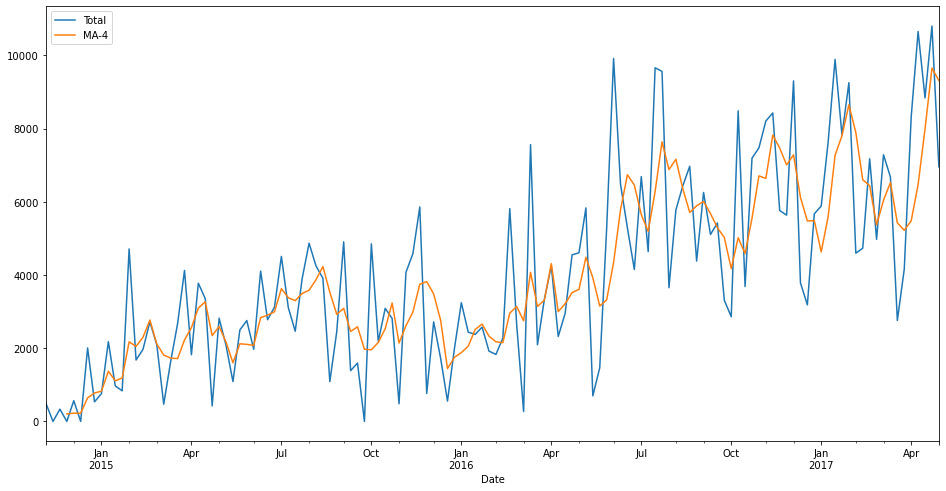

In [20]:
df["MA-4"] = df.rolling(window=4).mean()  # MA-4 for moving average of size 4 window
df.plot(y=["Total", "MA-4"], figsize=(16, 8))

Let's try a larger window size. Because now we have two columns in the data, we need to specify which column we are taking a moving average of.

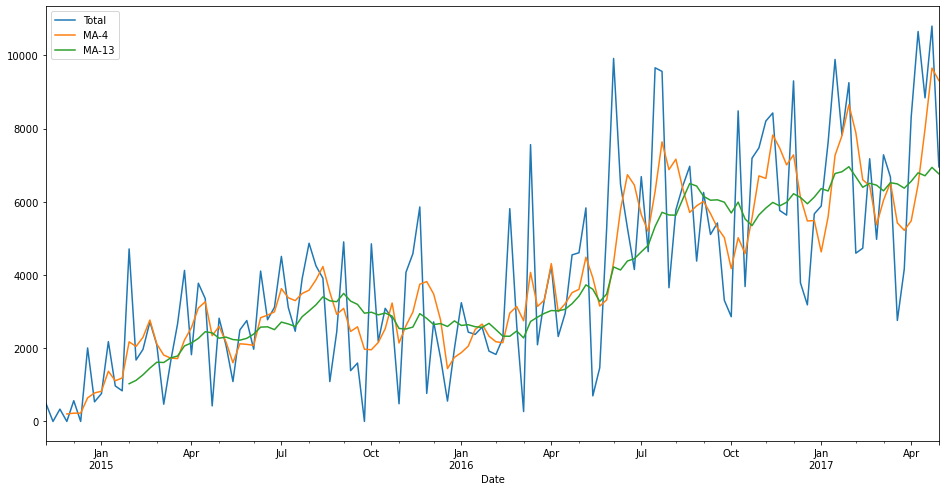

In [21]:
df["MA-13"] = (
    df["Total"].rolling(window=13).mean()
)  # MA-4 for moving average of size 4 window
df.plot(y=["Total", "MA-4", "MA-13"], figsize=(16, 8))

As the name suggests __Moving Average Smoothing__ creates a smoothed out version of the data. The larger the window size, smoother the data will be. This is helpful when we want to get rid of noise in the data so we can have a better look at the trends. However, noise reduction comes at a cost. The downside of using moving average is the it creates lag in the data. For instance if there is a sudden increase in the data moving average responds to this change slower. It also doesn't reach the peaks of the original data. In the plot above you can see that "MA-13" does not show the high and low values of the data but only follows th main trend.

Another useful function pandas provide is expanding. While at each point rolling applied a function over a fixed window, expanding applies a function over all the points that came before that specific point. For instance, if we apply mean function at 10th point we will have the average of first 10 points and at 20th point we will have the average of first 20 points.<br>


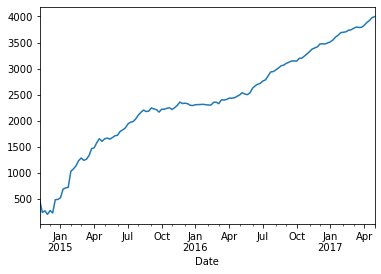

In [22]:
df["Total"].expanding().mean().plot()

## Lowess Smoothing
Now that we learned about moving average smoothing, let's discuss another technique. Locally weighted scatterplot smoothing (LOWESS) is another technique for smoothing. Lowess creates local models for small subsets of data and uses a weighted average of them for smoothing.The implementation of Lowess in statsmodels can be found in nonparametric sub-module.


In [23]:
from statsmodels.nonparametric.smoothers_lowess import lowess

To create a smoothed output it requires x and y values. For time series x would be the time dimension and y would be the values.

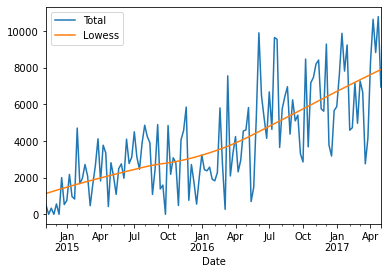

In [24]:
x = df.index
y = df["Total"]
result = lowess(y, x)
df["Lowess"] = result[
    :, 1
]  # Lowess returns x and y. The second column (column index 1) are the values we need.
df.plot(y=["Total", "Lowess"])

## Time Series Decomposition

The goal of decomposition is to break down time series into different elements each describing a specific behaviour of data.

### Hodrick-Prescott filter
[Hodrick-Prescott filter](https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter) breaks down time series into two components:<br>
1. Trend: The general trend in the data.
2. Cycle: Refers to the oscilation of data around the trend.<br>

The sum of trend and cycle creates the original time serie. Hodrick-Prescott filter minimises the following equation:
$$\min_{\tau}\left(\sum_{t = 1}^T {(y_t - \tau _t )^2 }  + \lambda \sum_{t = 2}^{T - 1} {[(\tau _{t+1}  - \tau _t) - (\tau _t  - \tau _{t - 1} )]^2 }\right)\,$$
In this equation $\tau_t$ is the trend component. There is also $\lambda$ the value of which is critical for the results. Check out [statsmodel documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html) for choosing the right value for $\lambda$.<br>
Let's just see the effect of lambda by trying a few values.

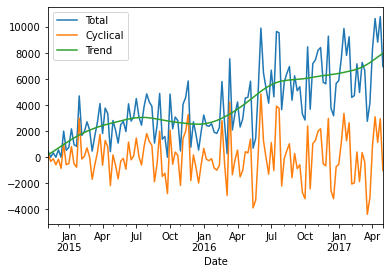

In [25]:
# Hodrick-Prescott filter
from statsmodels.tsa.filters.hp_filter import hpfilter

cyc, trnd = hpfilter(df["Total"], lamb=1600)
# put the result in a new data frame for visualisation
hpf = df[["Total"]].copy()
hpf["Cyclical"] = cyc
hpf["Trend"] = trnd
hpf.plot()

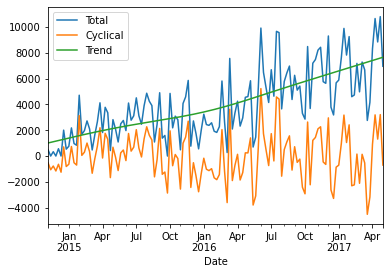

In [26]:
# Hodrick-Prescott filter
from statsmodels.tsa.filters.hp_filter import hpfilter

cyc, trnd = hpfilter(df["Total"], lamb=1600 * 3 ** 4)
# put the result in a new data frame for visualisation
hpf = df[["Total"]].copy()
hpf["Cyclical"] = cyc
hpf["Trend"] = trnd
hpf.plot()

### STL Decomposition

Seasonal-Trend decomposition with LOESS (STL) is another method for decomposition of time series. This method breaks down the data into three elements:
1. Trend
2. Seasonality
3. Residual (Error or Noise)

We learned about LOWESS for smoothing (LOESS is a similar method with only minor differences). LOESS showed the capability to extract the trend of time series. By removing the trend from the data STL assumes the remainder is sum of a seasonal component and some residual. Seasonal component is the repeating pattern of data. The sort of behaviour that repeats weekly, monthly, etc.<br>STL can decompose the time serie in two ways. First is additive method, where the original data is sum of its components:
$$y_t = \tau_t + s_t + r_t $$
Second, the multiplicative approach where the data is product of its components:
$$y_t = \tau_t \times s_t \times r_t $$
Statsmodel has a function for STL called `seasonal_decompose`.

In [27]:
# This data shows the number of customers a retail shop had per months
cust = pd.read_csv(
    "../../data/processed/Generated/Customers.csv", parse_dates=True, index_col="Month"
)
cust.head()

,Customers
Month,
1994-01-01,412
1994-02-01,406
1994-03-01,456
1994-04-01,440
1994-05-01,422


Let's have quick look at the data.

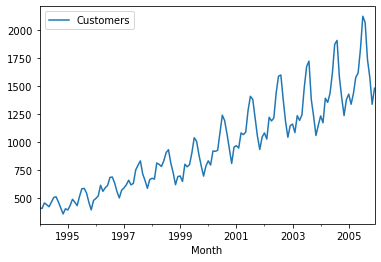

In [28]:
cust.plot(y="Customers")

We can clearly see a repeating pattern. That's called seasonality and we expect STL to be able to capture this behaviour.

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(cust["Customers"])

Now the time serie is decomposed and we can plot the result.

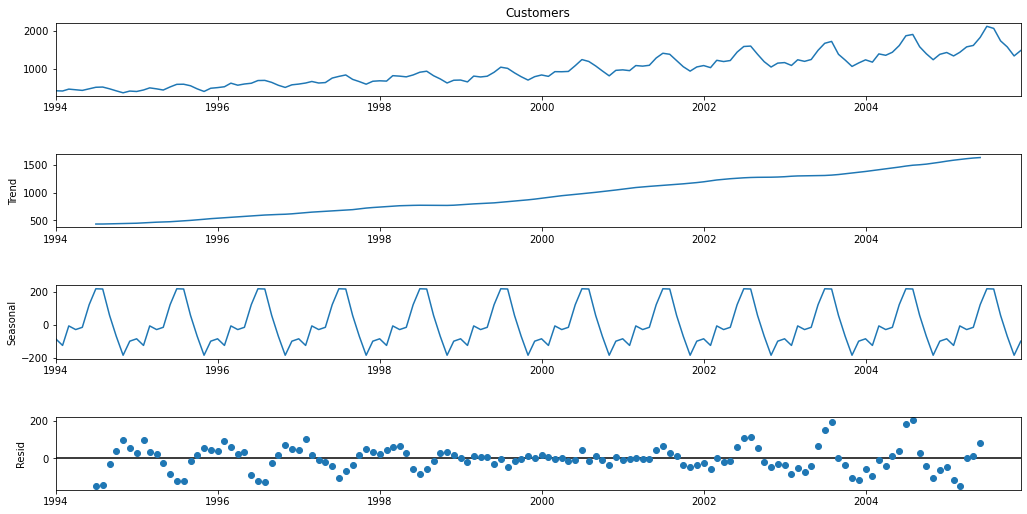

In [30]:
ax = result.plot()
ax.set_figwidth(16)
ax.set_figheight(8)

By default the model used additive approach for the data. If we want to use multiplicative approach we need to specify it in the function. But what is the difference between additive and multiplicative? Additive approach is used when the height of the repeating patterns are constant. This means the amplitude of seasonal component is not changing. But in this data we can clearly see the seasonal component is getting larger and larger. This is also visible in the residual component. The residual component is meant to look like random noise but we can clearly see some regular oscillation in there. So let's try multiplicative approach.

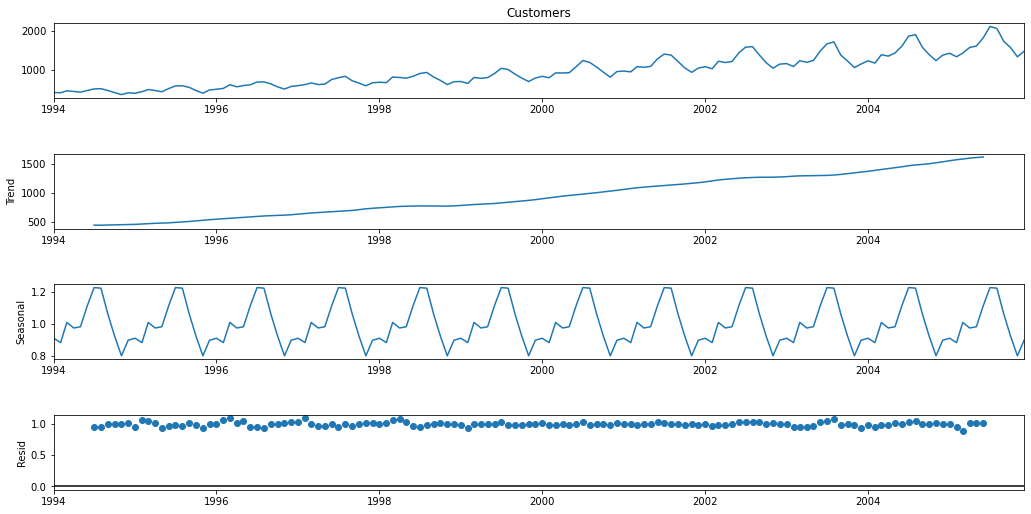

In [31]:
result = seasonal_decompose(cust["Customers"], model="multiplicative")
ax = result.plot()
ax.set_figwidth(16)
ax.set_figheight(8)

__Note:__ While residuals in additive model is around zero, in multiplicative model they are around one.

As we can see, multiplicative approach looks much better. There is still a bit of pattern in residuals but it has improved significantly compared to additive approach.

## Exponentially Weighted Moving Average (EWMA)
EWMA is different from moving average smoothing we used before. Instead of using a fixed window, EWMA gives more weight to more recent data and less weight to older ones. This method is also refered to as Holt-Winters Simple Exponential Smoothing (SES).<br> 
$$s_t = \alpha x_{t} + (1-\alpha) s_{t-1} = s_{t-1} + \alpha (x_{t} - s_{t-1})$$
$x_t$ is the time series value at time $t$, $s_t$ is the smoothed value at time $t$ and $\alpha$ is the smoothing factor which is between $0$ and $1$. <br>
Since this method gives more weight to the more recent data points it has a quicker reaction to changes in the data.<br>
Pandas has a dedicated function for EWMA. You can calculate EWMA using `.ewm()` method and passing in a value for $\alpha$. Then apply `mean` function to result to get EWMA.


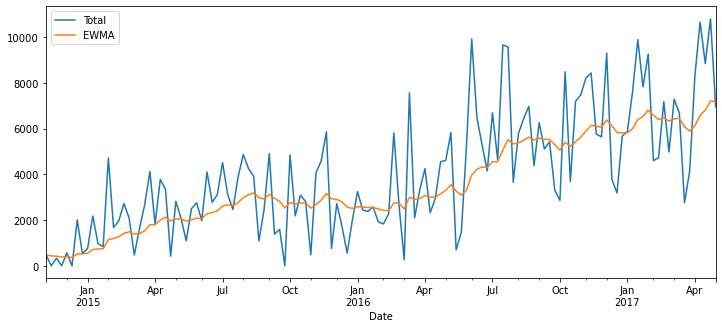

In [32]:
# low value for alpha
df["EWMA"] = df["Total"].ewm(alpha=0.1, adjust=False).mean()
# df['Total'].plot()
df[["Total", "EWMA"]].plot(figsize=(12, 5))

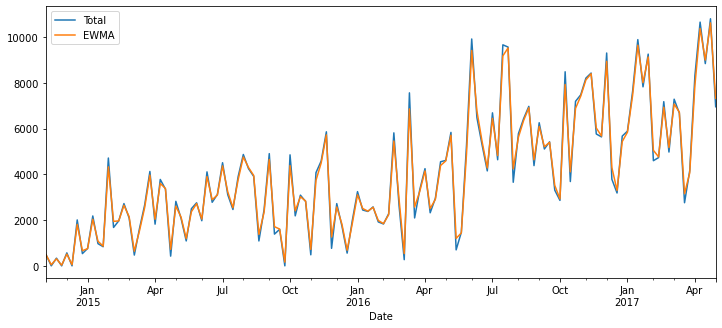

In [33]:
# high value for alpha
df["EWMA"] = df["Total"].ewm(alpha=0.9, adjust=False).mean()
# df['Total'].plot()
df[["Total", "EWMA"]].plot(figsize=(12, 5))

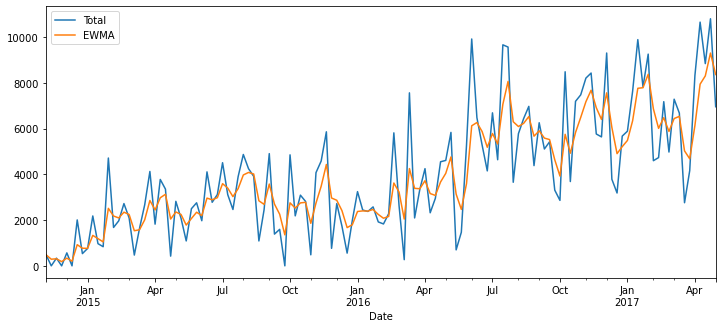

In [34]:
# medium value for alpha
df["EWMA"] = df["Total"].ewm(alpha=0.4, adjust=False).mean()
# df['Total'].plot()
df[["Total", "EWMA"]].plot(figsize=(12, 5))

As we can see, we can control how close the result should be to the actual data by changing $\alpha$. High value of $\alpha$ means we put more emphasis on the current value and very little to the past values, therefore it looks very close to the actual data. Low value of $\alpha$ means the importance of past values are more significant and also we look at a wider range of data. 

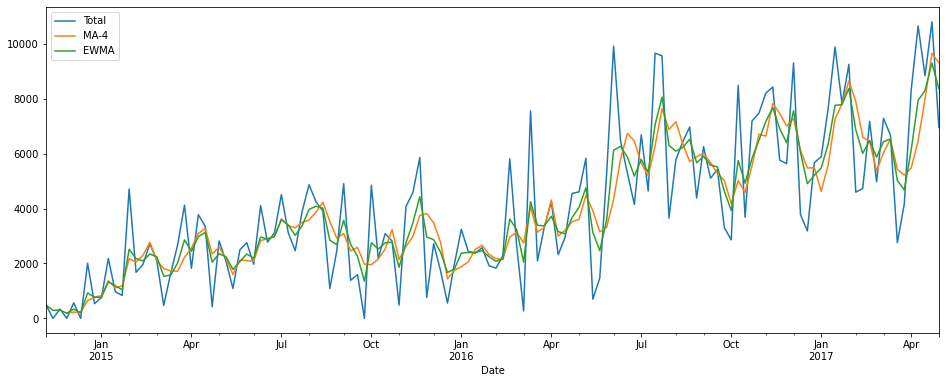

In [35]:
df[["Total", "MA-4", "EWMA"]].plot(figsize=(16, 6))

Statsmodel has its own implementation of EWMA or SES. To use statsmodel implementation of SES we first create an instance of the model by passing in time series data. Then we train the model by setting the characteristics of the model. Note that the smoothing level is the same as $\alpha$ in pandas.

In [36]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(df["Total"])
model_trained = model.fit(smoothing_level=0.4, optimized=False)
df["SES"] = model_trained.fittedvalues

In [37]:
df[["EWMA", "SES"]]

,EWMA,SES
Date,,
2014-11-09,482.839269,482.839269
2014-11-16,289.703561,482.839269
2014-11-23,308.112459,289.703561
2014-11-30,184.867475,308.112459
2014-12-07,337.487496,184.867475
...,...,...
2017-04-02,6133.311328,4678.622124
2017-04-09,7940.410825,6133.311328
2017-04-16,8299.468461,7940.410825


Notice that SES and EWMA have exact same values, but SES is one time step behind and also has a repetition in the first row. We can shift SES one step back to get identical results.

In [38]:
df["SES"] = df["SES"].shift(-1)
df[["EWMA", "SES"]].head()

,EWMA,SES
Date,,
2014-11-09,482.839269,482.839269
2014-11-16,289.703561,289.703561
2014-11-23,308.112459,308.112459
2014-11-30,184.867475,184.867475
2014-12-07,337.487496,337.487496


### Holt-Winters Double Exponential Smoothing
Holt-Winters Double Exponential Smoothing applies two smoothing factors. One is $\alpha$ (which is smoothing factor for the level) and the other is ($\beta$ which is smoothing factor for trend). Level ($l_t$) is an estimate of the value at time $t$ and trend ($b_t$) is an estimate of slope at time $t$. The sum of these two values are the forcasted of value at the next point.
$$y_t = l_t+b_t$$
For more information about the formulation of double exponential smoothing visit [this page](https://otexts.com/fpp2/holt.html).
<br>Since both level and trend are smoothed using smoothing factors the method is known as double exponential smoothing. In stats model we can use `ExponentialSmoothing` apply this technique.

In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [40]:
# Double exponential smoothing statsmodels
model = ExponentialSmoothing(df["Total"], trend="additive")
model_tr = model.fit(smoothing_level=0.4, smoothing_slope=0.4, optimized=False)
df["DES"] = model_tr.fittedvalues.shift(-1)

Similar to STL decomposition we need to specify here whether level and trend are additive or multiplicative. We also need to specify the smoothig factor for level and slope a.k.a $\alpha$ and $\beta$.

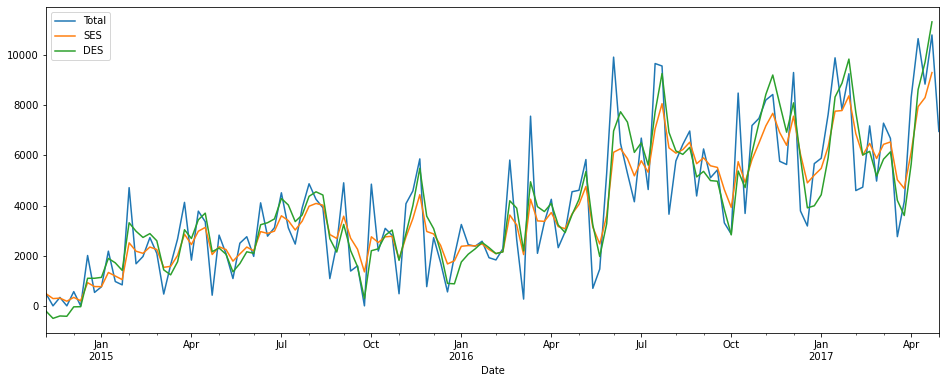

In [41]:
df.plot(y=["Total", "SES", "DES"], figsize=(16, 6))

As you can see double exponential smoothing follows the patthern of the data closer compared to SES.

### Holt-Winters Triple Exponential Smoothing
As you might guess, triple exponential smoothing is using three smoothing factors. It has the same $\alpha$ and $\beta$ for level and trend, plus an extra smoothing factor, $\gamma$ for the seasonal component. This method breaks down the time series into three elements, level, trend, and seasonality and then uses a smoothing factor for each to predict the next value. For more information about the formulation of triple exponential smoothing visit [this page](https://otexts.com/fpp2/holt-winters.html).
<br>In statsmodel we use the same function for double and triple exponential smoothing. To use this function for triple exponential smoothing we need to first specify how each of trend and seasonality should be incorporated (additive or multiplicative) and then when fitting the model pass in values of smoothing factors. There is also one more value we need to pass in when creating the model and that is seasonal periods. Seasonal periods lets the model know about the length of the seasonal cycles.

In [42]:
# Triple exponential smoothing statsmodels
model = ExponentialSmoothing(
    df["Total"], trend="additive", seasonal="additive", seasonal_periods=4
)
model_tr = model.fit(
    smoothing_level=0.4, smoothing_slope=0.4, smoothing_seasonal=0.4, optimized=False
)
df["TES"] = model_tr.fittedvalues.shift(-1)

In [43]:
df["TES"]

Date
2014-11-09      206.078082
2014-11-16      546.612375
2014-11-23      180.029812
2014-11-30      558.306345
2014-12-07       79.515116
                  ...     
2017-04-02     5408.304231
2017-04-09     7272.278422
2017-04-16    10396.328082
2017-04-23    13816.146016
2017-04-30             NaN
Freq: W-SUN, Name: TES, Length: 130, dtype: float64

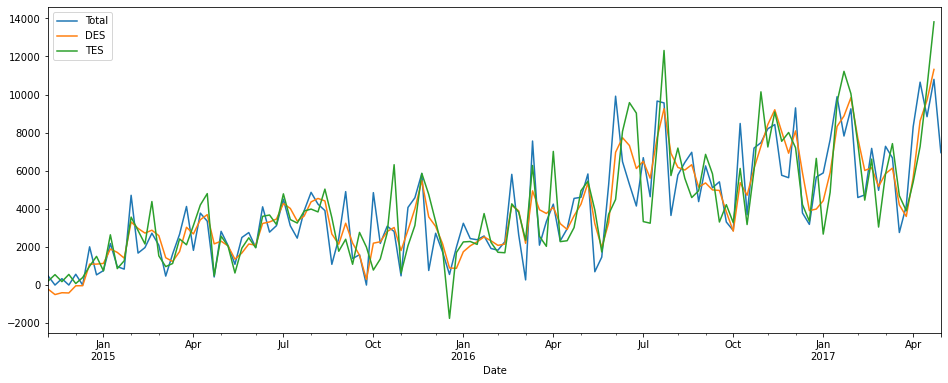

In [44]:
df.plot(y=["Total", "DES", "TES"], figsize=(16, 6))

Let's have a closer look.

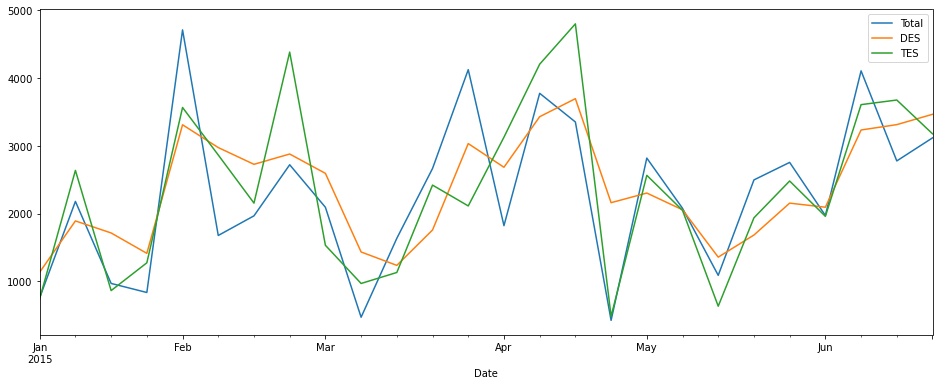

In [45]:
df.loc["2015-01-01":"2015-07-01"].plot(y=["Total", "DES", "TES"], figsize=(16, 6))

Now to familiarise yourself with these techniques apply various smoothing methods mentioned above on "Customers" dataset.

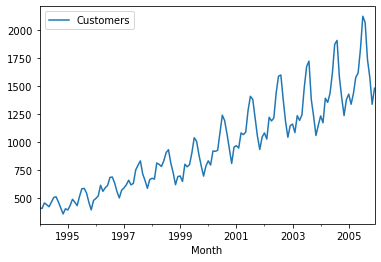

In [46]:
cust = pd.read_csv(
    "../../data/processed/Generated/Customers.csv", parse_dates=True, index_col="Month"
)
cust.plot()

In [47]:
df.head()

,Total,MA-4,MA-13,Lowess,EWMA,SES,DES,TES
Date,,,,,,,,
2014-11-09,482.839269,NaN,NaN,1140.189771,482.839269,482.839269,-212.449278,206.078082
2014-11-16,0.000000,NaN,NaN,1184.646044,289.703561,289.703561,-499.062669,546.612375
2014-11-23,335.725804,NaN,NaN,1228.669605,308.112459,308.112459,-403.174225,180.029812
2014-11-30,0.000000,204.641268,NaN,1272.252779,184.867475,184.867475,-415.423605,558.306345
2014-12-07,566.417526,225.535833,NaN,1315.391549,337.487496,337.487496,-39.111641,79.515116


## Exercise
<div class="alert alert-success">

let's try these on real data, which will be much harder. Use the data below and perform the following analyses:
    
1. Hodrick-Prescott filter using $\lambda = 10^7$.
2. STL decomposition using additive method.
3. Triple exponential smoothing using $\alpha=0.3$, $\beta=0.3$, and $\gamma=0$. Use additive models and seasonal period of 24.
   
<details>
<summary>Hints</summary>
    
* Find the relevent code, copy it, and change the parameter. It's not a trick question.
</details>
</div>


,target
day,
2011-12-03,9.007000
2011-12-04,20.763000
2011-12-05,6.020000
2011-12-06,13.322000
2011-12-07,9.062000
...,...
2014-02-24,20.788405
2014-02-25,21.585762
2014-02-26,20.497476


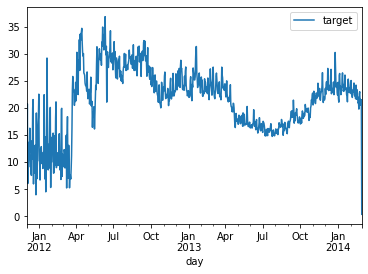

In [71]:
df = block0 = pd.read_csv("../../data/processed/smartmeter/block_0.csv", parse_dates=['day'], index_col=['day'])[['energy_sum']]
df = df.groupby('day').mean()
df = df.rename(columns={'energy_sum':'target'})
df.plot()
df

In [49]:
# Exercise 1

In [50]:
# Exercise 2

In [51]:
# Exercise 3


<div class="alert alert-success">
    
### Solutions  
<details><summary>See solutions</summary>

<details><summary>Exercise 1</summary>

```Python
from statsmodels.tsa.filters.hp_filter import hpfilter
_,trend = hpfilter(df['T1'],lamb=1e7)
hpf = df[['T1']].copy()
hpf['Trend'] = trend
hpf.plot()
```

</details>
<details><summary>Exercise 2</summary>

```Python
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['T1'],model = 'add')
result.plot();
```

</details>
<details><summary>Exercise 3</summary>

```Python
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(df['T1'],
                             trend = 'additive',
                             seasonal='additive',
                             seasonal_periods=24)
model_tr = model.fit(smoothing_level=.3,
                     smoothing_slope=.3,
                     smoothing_seasonal=0,
                     optimized=False)
df['DES'] = model_tr.fittedvalues.shift(-1)
df.iloc[-120:].plot()
```

</details>
</details>
</div>

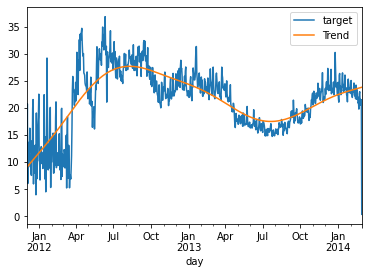

In [58]:
from statsmodels.tsa.filters.hp_filter import hpfilter
_,trend = hpfilter(df['target'],lamb=1e7)
hpf = df[['target']].copy()
hpf['Trend'] = trend
hpf.plot()

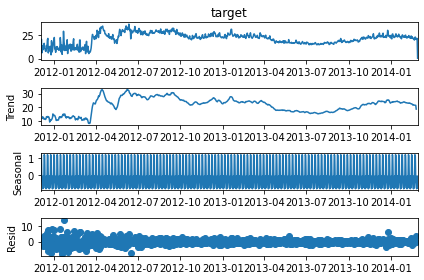

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['target'],model = 'add')
result.plot();

/anaconda/envs/py37_pytorch/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


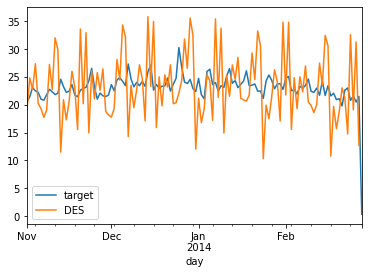

In [74]:
# TODO Mike get working decently
# TODO Mike update and remove answers
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(df['target'],
                             trend = 'additive',
                             seasonal='additive',
                             seasonal_periods=24)
model_tr = model.fit(smoothing_level=.3,
                     smoothing_slope=.3,
                     smoothing_seasonal=0,
                     optimized=False)
df['DES'] = model_tr.fittedvalues.shift(-1)
df.iloc[-120:].plot()

## Further Reading:
- [Pandas time-series documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)
- [Statsmodel documentation](https://www.statsmodels.org/)
- [Forecasting: Principles and Practice](https://otexts.com/fpp2/)
- [Exponential Smoothing](https://en.wikipedia.org/wiki/Exponential_smoothing)
- [Gentle Introduction to Exponential smoothing](https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/)

